## Advanced Linear Regression Assignment

### House Price Prediction using Ridge and Lasso

In this notebook, we will build a model to predict House price using Ridge and Lasso Linear Regression.

The solution is divided into the following sections:

- Data Understanding
- Data Cleaning and Manipulation
- Data Visualization
- Data Preparation
- Model Building - Ridge and Lasso Regression
- Model Evaluation
- Interpretations & Conclusions

### 1. Data Understanding

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df =  pd.read_csv("https://raw.githubusercontent.com/nazneenansari/dataset/master/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.shape

(1460, 81)

In [7]:
# check for null values in all categorical columns

df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### 2. Data Cleaning and Manipulation

#### a. Replace column with NA with None

In [8]:
# Replace NA with None as NA cannot be treated as null

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    df[col]=df[col].fillna('None')

#### b. Drop variabes with very high percentage of any single value

In [9]:
#check for columns with more that 85% same values

drop_columns = []
drop_threshold = 0.85 #define the percentage criterion for drop
for cols in df.columns:
    df_count = df[cols].value_counts().reset_index()
    df_count['drop_percentage'] = df_count[cols]/df.shape[0]
    df_count['drop_criterion']  = df_count['drop_percentage'] > drop_threshold
    if True in df_count.drop_criterion.values:
        drop_columns.append(cols)
        #print(df[cols].value_counts())
df = df.drop(columns=drop_columns,axis=1)

In [10]:
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

#### c. Impute null values with median/mode values

In [11]:
df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

df['GarageYrBlt']=df['GarageYrBlt'].fillna(0).astype(int)

In [12]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [13]:
# Check if there are any duplicate values in the dataset

df[df.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleCondition,SalePrice


#### e. Outliers Treatment

In [14]:
# Checking outliers at 25%,50%,75%,90%,95% and above

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,...,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,12.000000,2010.000000,442567.010000


In [15]:
numerical_columns = df.select_dtypes(include=['int64', 'float'])
numerical_columns.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

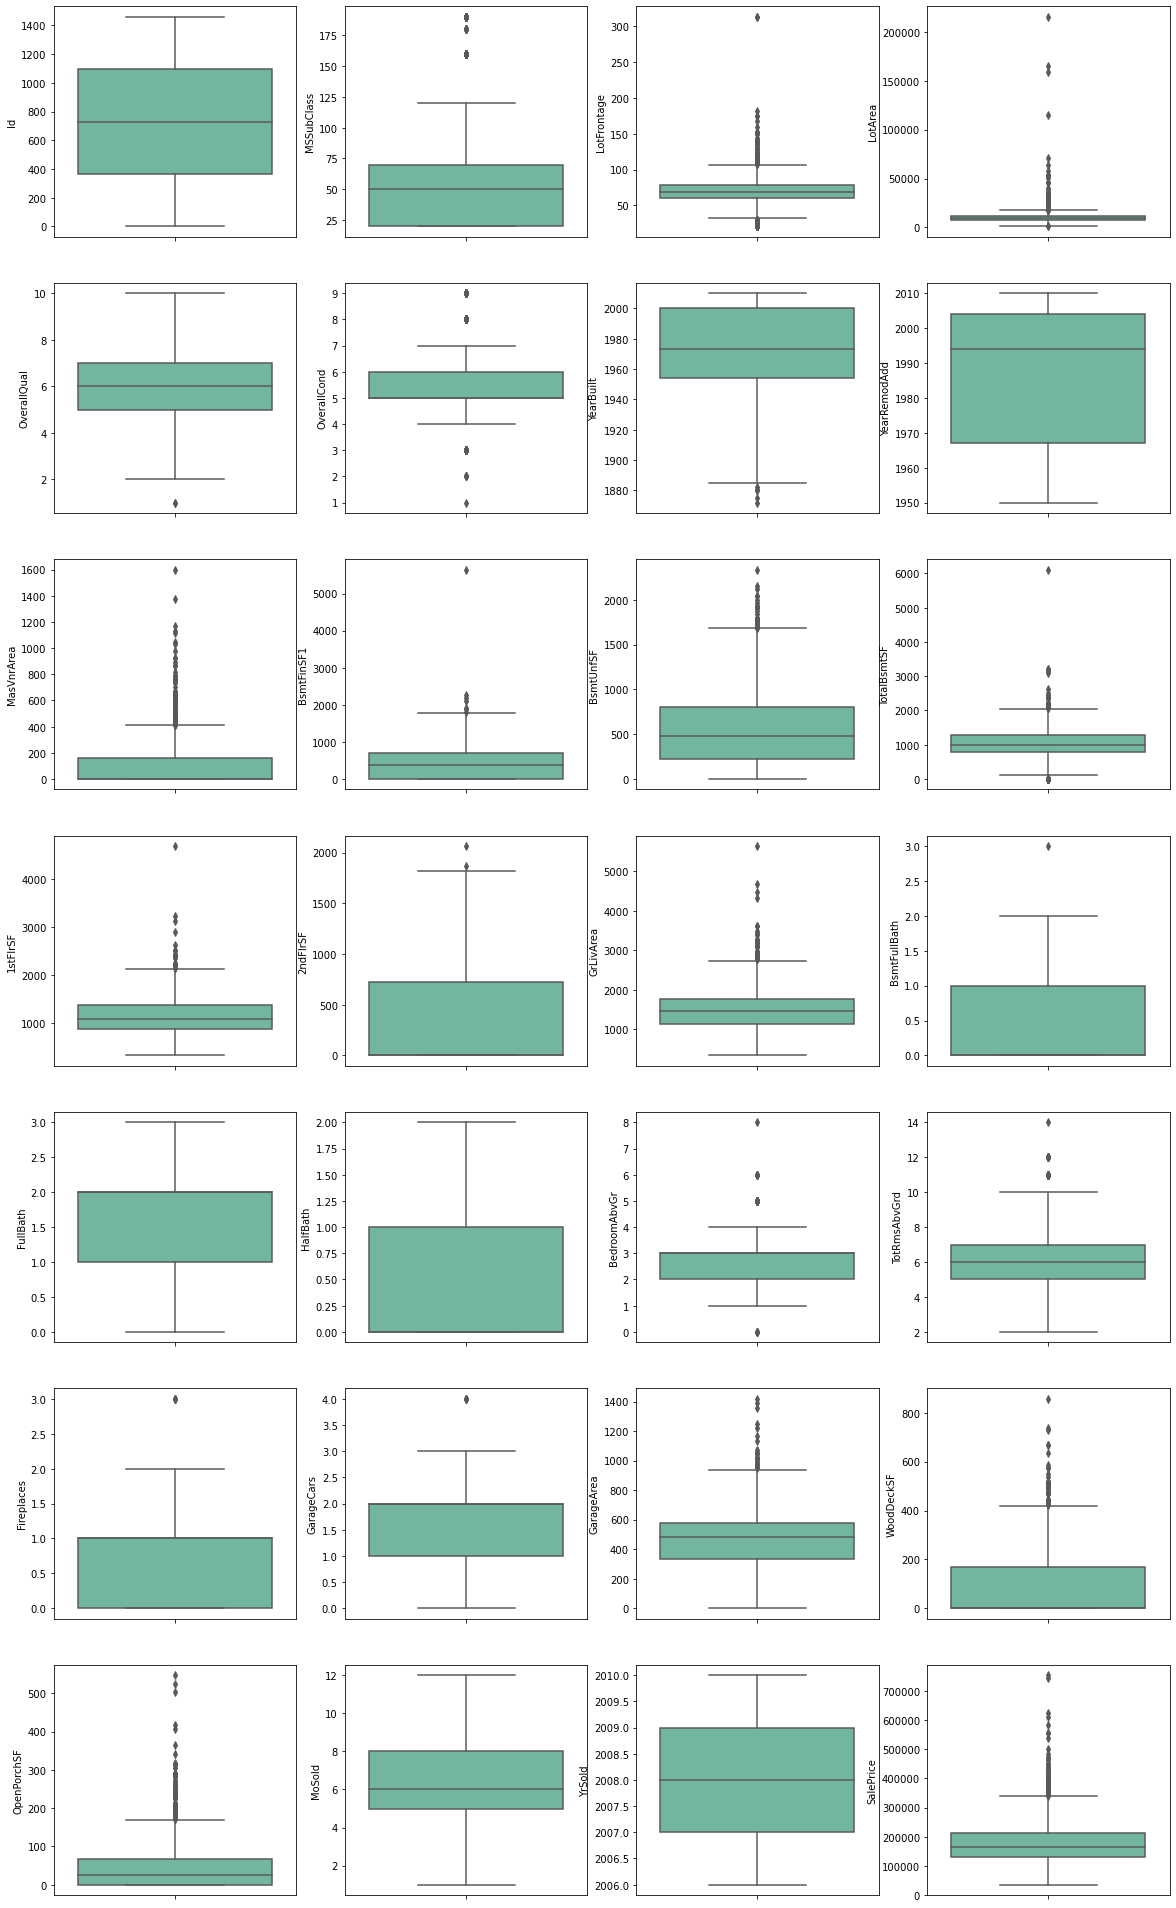

In [16]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20,50))
i = 1
for cols in numerical_columns.columns:
    plt.subplot(10,4,i)
    sns.boxplot(y = cols , palette='Set2', data = df)
    i+=1
plt.show()

In [17]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = df['MasVnrArea'].quantile(0.98)
df = df[df["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < nn_quartile_OpenPorchSF]

#### f. Creating Derived Metrics

In [18]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['IsRemodelled'] = df.apply(checkForRemodel, axis=1) 

In [19]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['BuiltOrRemodelAge'] = df.apply(getBuiltOrRemodelAge, axis=1)

In [20]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df['OldOrNewGarage'] = df['GarageYrBlt'].apply(getGarageConstructionPeriod)

#### g. Drop columns irrelevant for the analysis

In [21]:
df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt', 'MoSold', 'Id'], axis = 1, inplace = True)

### 3. Data Visualization

#### a. Correlation between continuous numerical variables

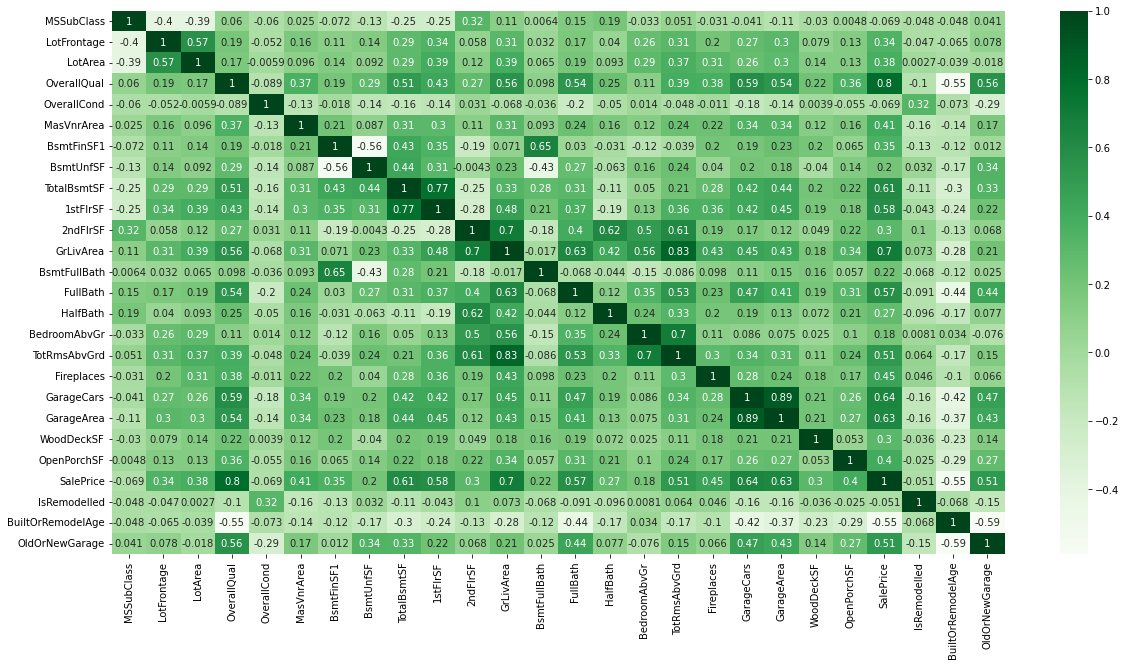

In [22]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap="Greens")
plt.show()

TotalBsmtSF & 1stFlrSF have 77% correlation
TotRmsAbvGrd & GrLivArea have 83% correlation
GarageCars & GarageArea have 89% correlation

Hence, __dropping 1stFlrSF, TotRmsAbvGrd and GarageArea.__

In [23]:
df.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'], axis=1,inplace=True)

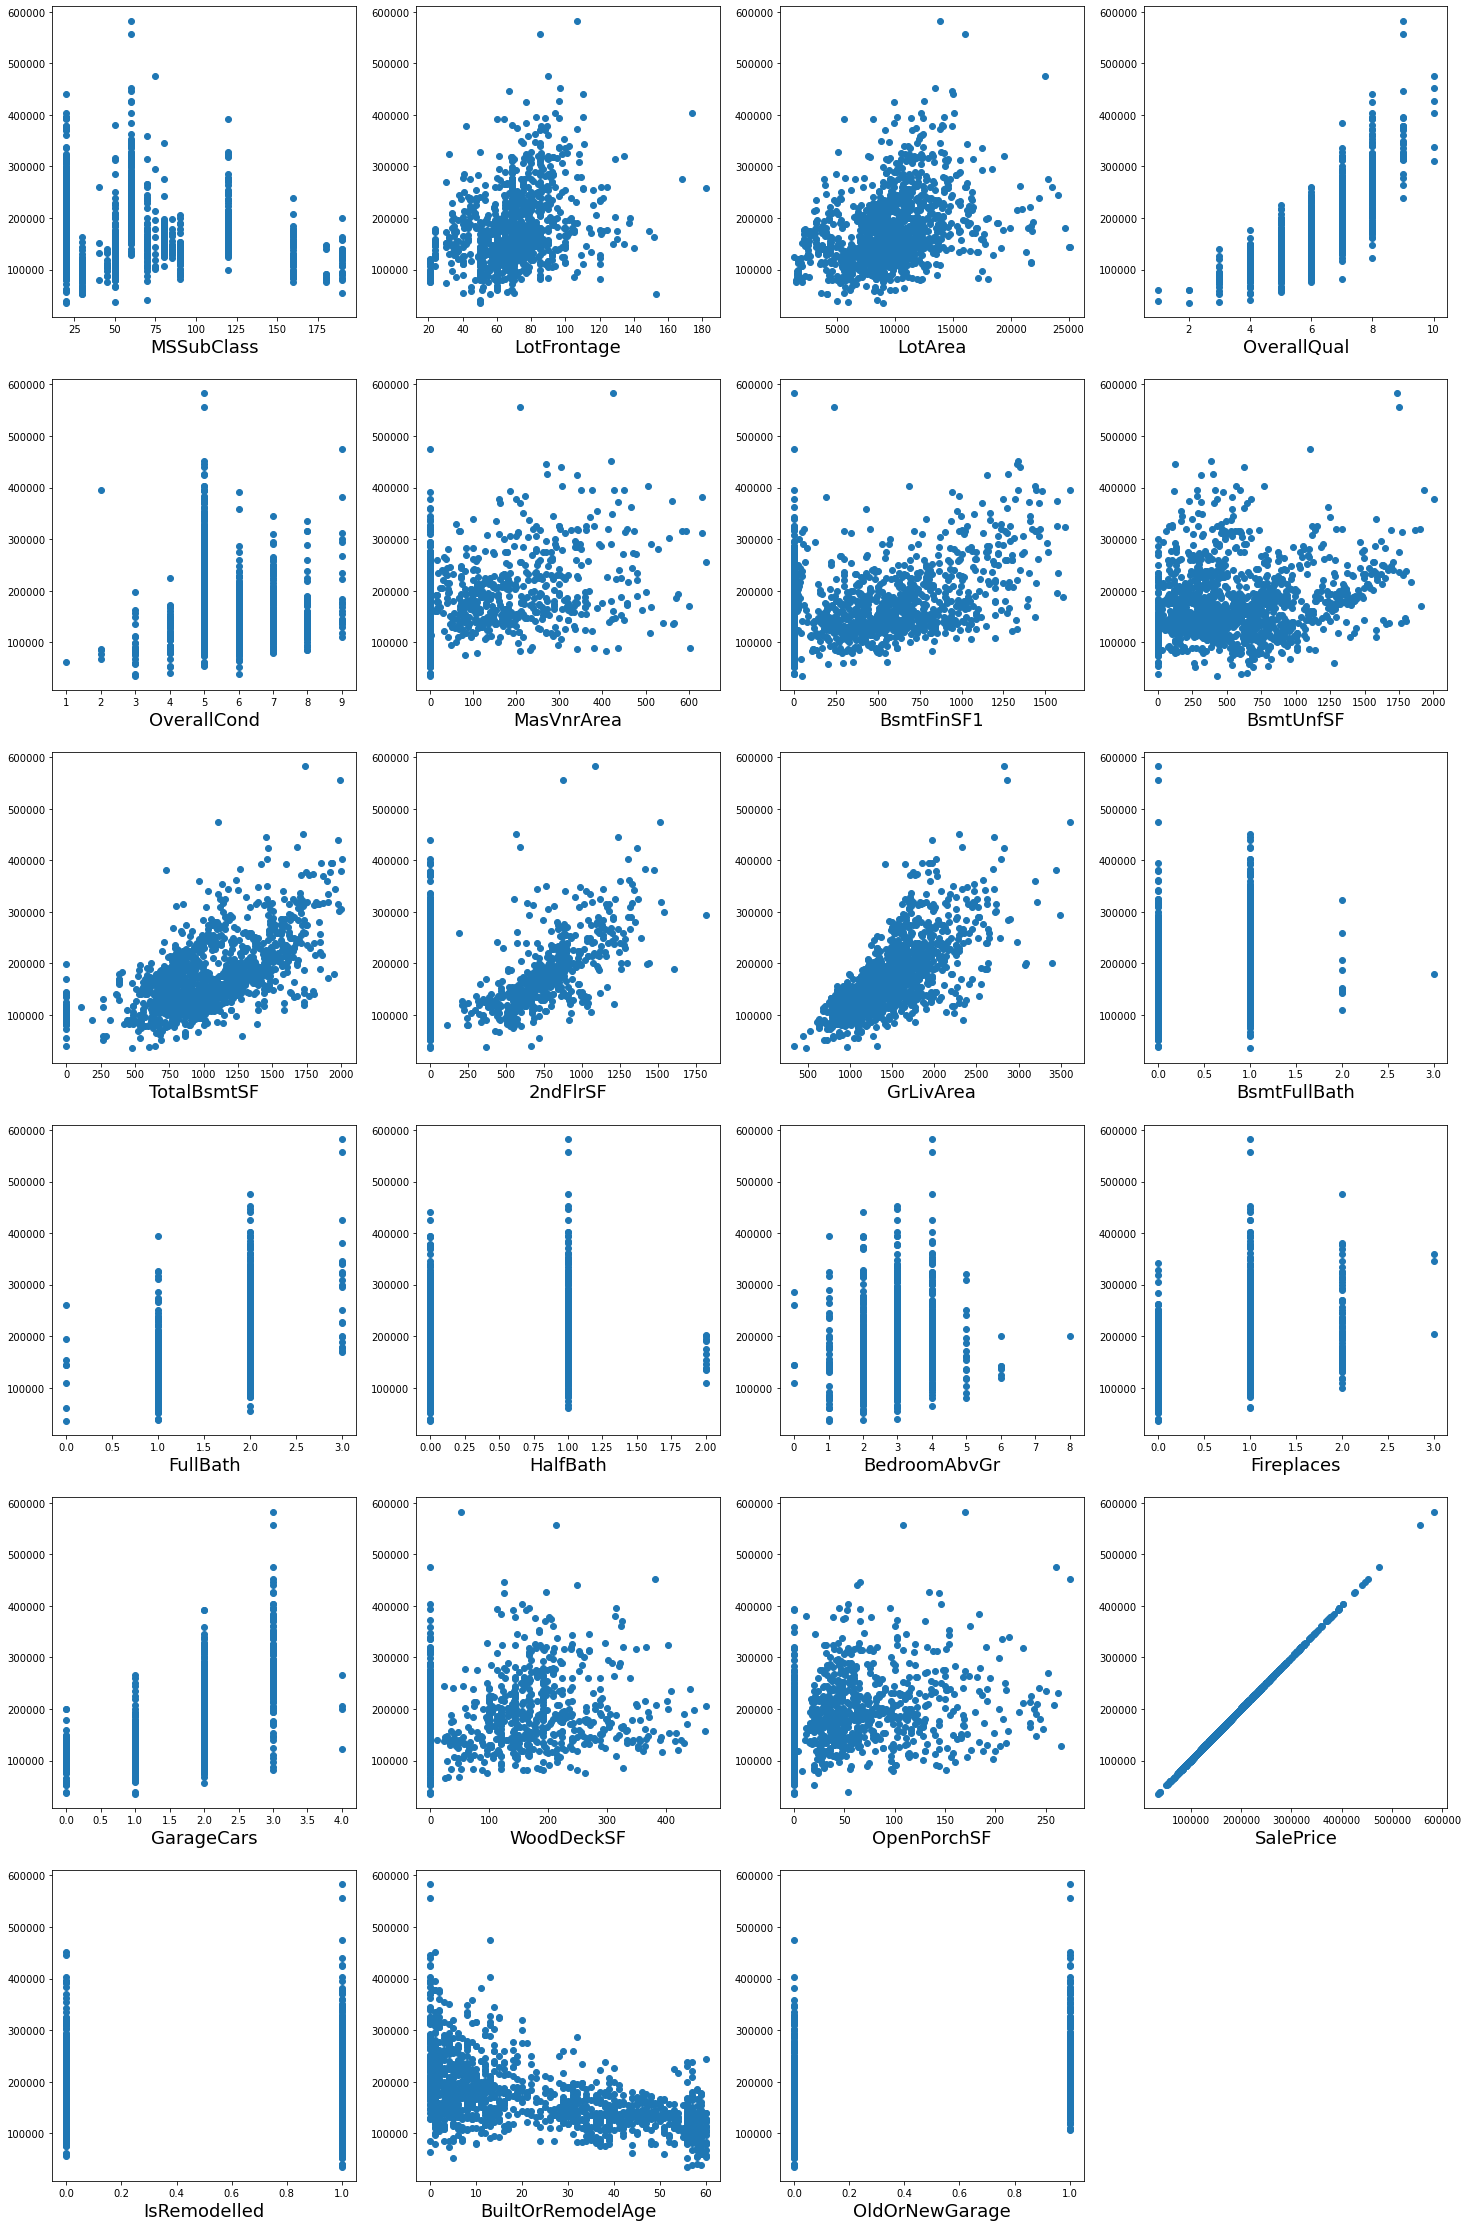

In [24]:
num_col=list(df.select_dtypes(['int64','float64']))
plt.figure(figsize=(25,40))
for i,j in enumerate(num_col):
    plt.subplot(6,4,(i+1))
    plt.scatter(df[j],df['SalePrice'])
    plt.xlabel(j,fontsize=18)
plt.show()

#### b. Categorical variables v/s target variable.

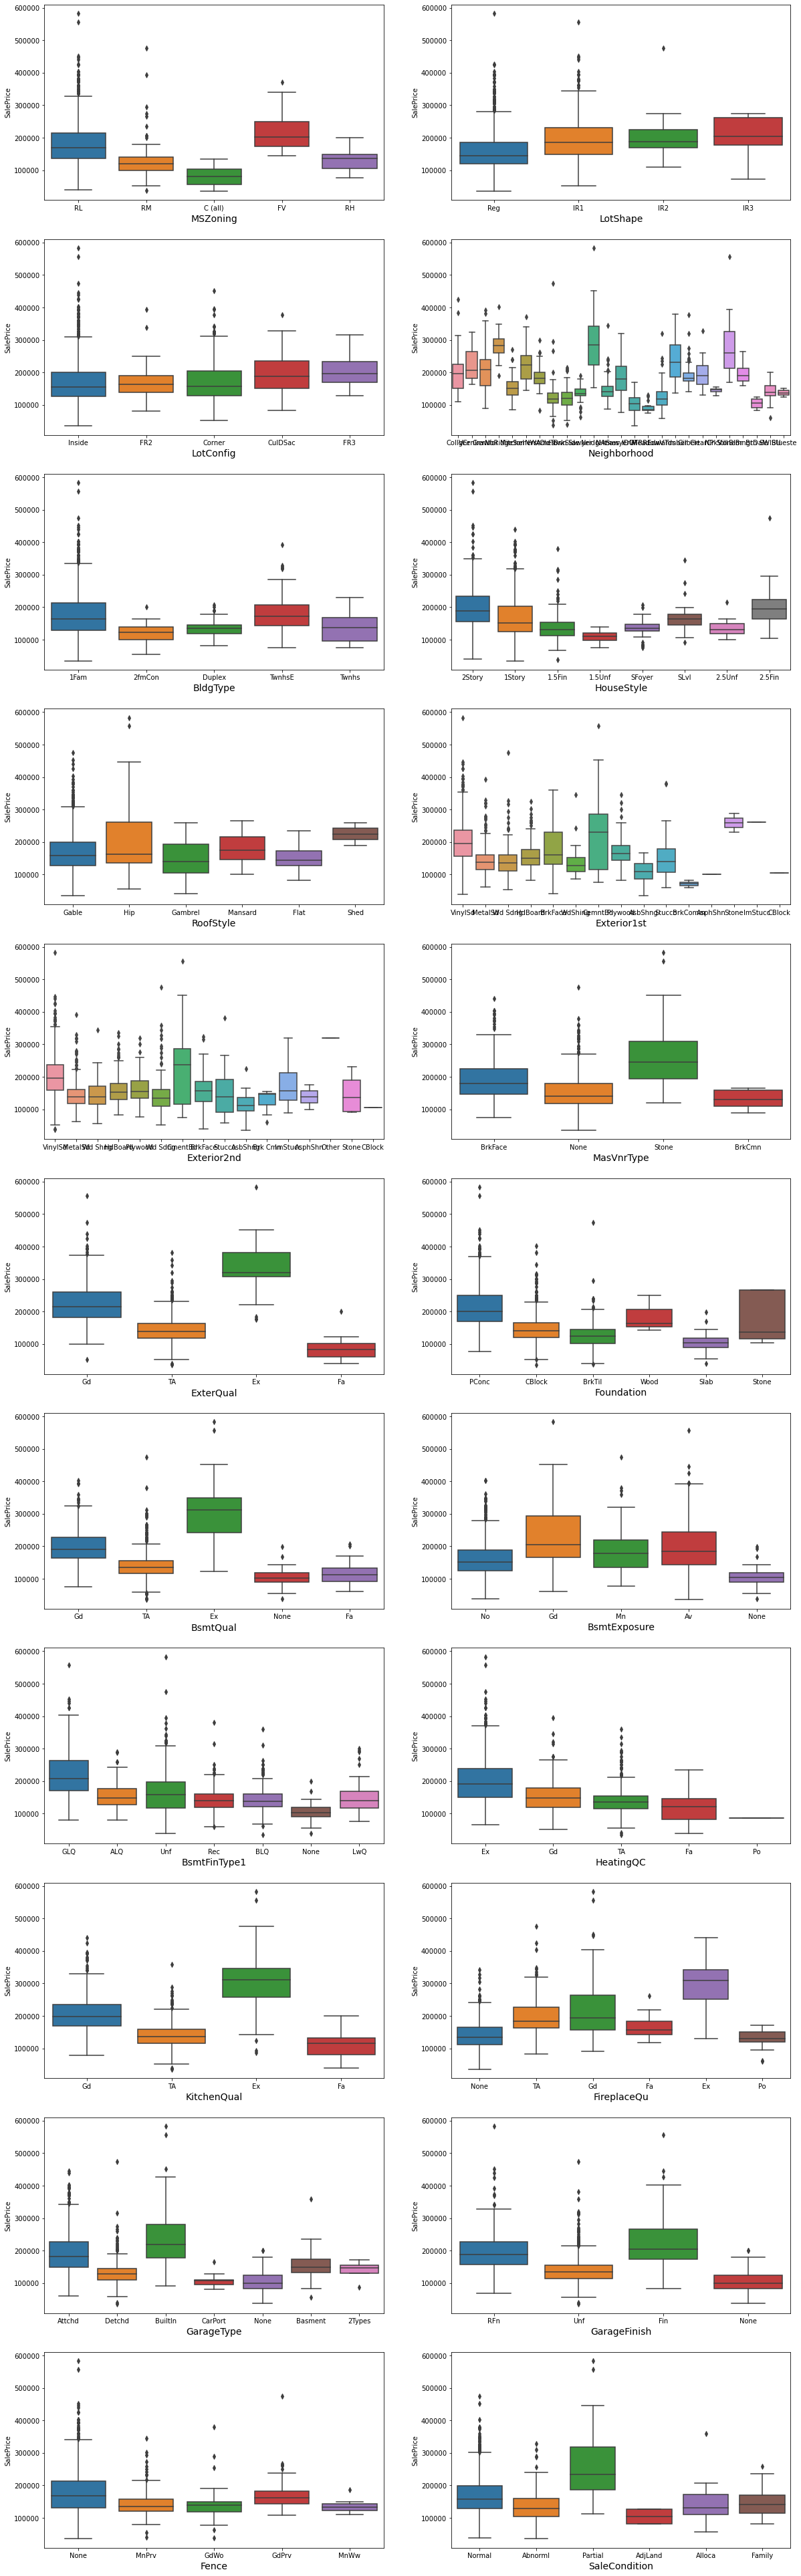

In [25]:
cat_col=list(df.select_dtypes('object'))
plt.figure(figsize=(20,70))
for m,n in enumerate(cat_col):
    plt.subplot(11,2,(m+1))
    sns.boxplot(x=n, y='SalePrice',data=df)
    plt.xlabel(n, fontsize=14)
    #plt.xticks(rotation=90)
plt.show()

### 4.Data Preparation

#### a. Convert  numeric variables to categorical variables

In [26]:
cat_columns=df.select_dtypes('object').columns
cat_columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'SaleCondition'],
      dtype='object')

In [27]:
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['BsmtFullBath'] = df['BsmtFullBath'].astype('object')
df['FullBath'] = df['FullBath'].astype('object')
df['HalfBath'] = df['HalfBath'].astype('object')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')
df['GarageCars'] = df['GarageCars'].astype('object')

#### b. Create dummies for unordered categorical variables.

In [28]:
unordered_columns=df.select_dtypes('object').columns
unordered_columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'Fence',
       'SaleCondition'],
      dtype='object')

In [29]:
for i in unordered_columns:
    dum_df=pd.get_dummies(df[i],prefix=i,drop_first=True)   #enabling drop_first
    df=pd.concat([df,dum_df],axis=1)
    df.drop(i,axis=1,inplace=True)   #dropping used object dtype column

#### c. Data Splitting and Feature Scaling 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

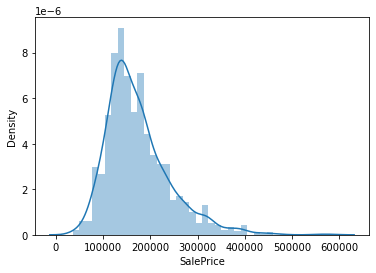

In [30]:
sns.distplot(df.SalePrice)

In [31]:
df["SalePrice"] = np.log(df["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

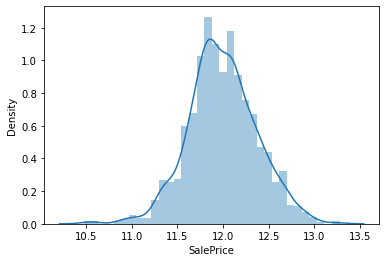

In [32]:
sns.distplot(df.SalePrice)

In [33]:
#Train Test split with 70:30 ratio
np.random.seed(0)
df_train, df_test= train_test_split(df,train_size=0.7, test_size=0.3, random_state=42)

In [34]:
#Use Normalized scaler to scale
scaler = MinMaxScaler()
num_vars = df.select_dtypes(include=['int64','int32','float64','float32']).columns
num_vars

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice', 'IsRemodelled', 'BuiltOrRemodelAge', 'OldOrNewGarage'],
      dtype='object')

In [35]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### d. Divide into X & y

In [36]:
y_train=df_train['SalePrice']
X_train=df_train.drop('SalePrice',axis=1)

y_test=df_test['SalePrice']
X_test=df_test.drop('SalePrice',axis=1)

### 5. Model Building 

#### a. Linear Regression Model

In [37]:
lm=LinearRegression()
lm.fit(X_train,y_train)
y_train_pred= lm.predict(X_train)
y_test_pred= lm.predict(X_test)

In [38]:
def getPerfMetric(y_train,y_train_pred, y_test, y_test_pred):

    # Train R2 score
    train_r2= r2_score(y_true=y_train,y_pred=y_train_pred)
    print("Train r2 = "+ str(round(train_r2, 4)))

    # Test R2 score
    test_r2 = r2_score(y_true=y_test,y_pred=y_test_pred)
    print("Test r2 = "+ str(round(test_r2, 4)))

    # Train RSS
    train_rss = np.sum(np.square(y_train - y_train_pred))
    print("Train RSS = " + str(round(train_rss, 4)))

    #Test RSS
    test_rss = np.sum(np.square(y_test - y_test_pred))
    print("Test RSS = " + str(round(test_rss, 4)))

    #Train MSE
    train_mse= mean_squared_error(y_train, y_train_pred)
    print("Train MSE = " + str(round(train_mse, 4)))

    #Test MSE
    test_mse = mean_squared_error(y_test, y_test_pred)
    print("Test MSE = "+ str(round(test_mse, 4)))

In [39]:
getPerfMetric(y_train,y_train_pred, y_test, y_test_pred)

Train r2 = 0.9388
Test r2 = -1.1772839948433923e+18
Train RSS = 1.1251
Test RSS = 9.188260162716893e+18
Train MSE = 0.0012
Test MSE = 2.2520245496855132e+16


#### b. Ridge Regression Model

In [40]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge=Ridge()
folds=5
ridge_model_cv=GridSearchCV(estimator=ridge,
                           param_grid=params,
                           scoring='neg_mean_absolute_error',
                           cv=folds,
                           return_train_score=True,
                           verbose=1)
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

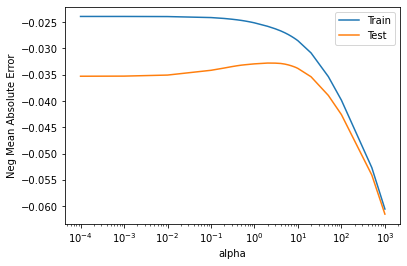

In [41]:
cv_results= pd.DataFrame(ridge_model_cv.cv_results_)
#plotting R2 score vs alpha value
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('Neg Mean Absolute Error')
plt.xscale('log')
plt.legend()
plt.show()

In [42]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=50]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
13,2.0,-0.025826,-0.032814,1
14,3.0,-0.026300,-0.032827,2
15,4.0,-0.026698,-0.032890,3
12,1.0,-0.025175,-0.032966,4
11,0.9,-0.025092,-0.033000,5
16,5.0,-0.027060,-0.033012,6
10,0.8,-0.025005,-0.033040,7
9,0.7,-0.024914,-0.033087,8
8,0.6,-0.024815,-0.033139,9
17,6.0,-0.027397,-0.033163,10


In [43]:
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=2.0)

In [44]:
y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)

In [45]:
getPerfMetric(y_train,y_train_pred, y_test, y_test_pred)

Train r2 = 0.9318
Test r2 = 0.8917
Train RSS = 1.2526
Test RSS = 0.8456
Train MSE = 0.0013
Test MSE = 0.0021


In [46]:
ridge_coeff_dict =dict(zip(X_train.columns,ridge.coef_))
ridge_coeff_dict

{'LotFrontage': 0.01179535426027214,
 'LotArea': 0.05573229744880288,
 'MasVnrArea': 0.0036501206459851705,
 'BsmtFinSF1': 0.04321730457240825,
 'BsmtUnfSF': 0.014011032676365824,
 'TotalBsmtSF': 0.11460893919914235,
 '2ndFlrSF': 0.04869478722134913,
 'GrLivArea': 0.14817040576147492,
 'WoodDeckSF': 0.019889260564631438,
 'OpenPorchSF': 0.012268280097812173,
 'IsRemodelled': -0.005871381212296427,
 'BuiltOrRemodelAge': -0.026663711950333464,
 'OldOrNewGarage': 0.008467805957409797,
 'MSSubClass_30': -0.034778710330457395,
 'MSSubClass_40': -0.02079944784820719,
 'MSSubClass_45': -0.004570923789115257,
 'MSSubClass_50': -0.0027077981835038896,
 'MSSubClass_60': 0.0039853805450903185,
 'MSSubClass_70': 0.006247816095773305,
 'MSSubClass_75': -0.008217279710512511,
 'MSSubClass_80': -0.00443261047955952,
 'MSSubClass_85': -0.0006221525878412652,
 'MSSubClass_90': -0.012150899485224496,
 'MSSubClass_120': -0.001868200841763627,
 'MSSubClass_160': -0.02476395494919256,
 'MSSubClass_180': -0

In [47]:
# Do an RFE to minimise the features to 15
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

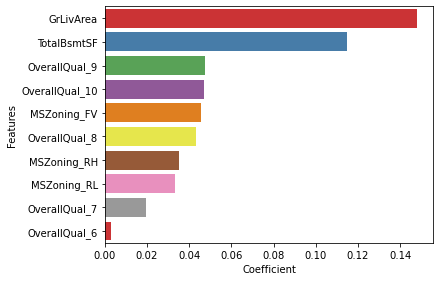

In [48]:
# bar plot to determine the variables that would affect pricing most using ridge regression
def findRidgeCoeff(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp_df = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df['Coefficient'] = temp_df['Features'].apply(findRidgeCoeff)
temp_df = temp_df.sort_values(by=['Coefficient'], ascending=False)
temp_df = temp_df.head(10)
temp_df

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp_df)
plt.show()

#### c. Lasso Regression Model

In [49]:
lasso=Lasso()
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]}
folds=5
lasso_model_cv=GridSearchCV(estimator=lasso,
                           param_grid=params,
                           scoring='neg_mean_absolute_error',
                            cv=folds,
                            return_train_score=True,
                           verbose=1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

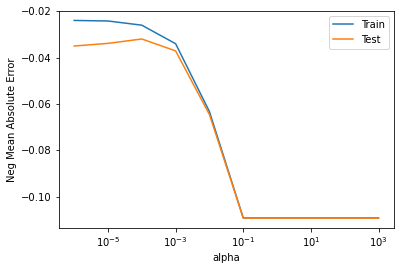

In [50]:
cv_results= pd.DataFrame(lasso_model_cv.cv_results_)
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('Neg Mean Absolute Error')
plt.xscale('log')
plt.legend()
plt.show()

In [51]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.0001,-0.026045,-0.031997,1
1,0.00001,-0.024239,-0.033894,2
0,0.000001,-0.024004,-0.035031,3
3,0.001,-0.034042,-0.037137,4
4,0.01,-0.063325,-0.064589,5
5,0.1,-0.109174,-0.109238,6
6,1,-0.109174,-0.109238,6
7,10,-0.109174,-0.109238,6
8,100,-0.109174,-0.109238,6
9,500,-0.109174,-0.109238,6


In [52]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [53]:
lasso_dict=dict(zip(X_train.columns,lasso.coef_))
lasso_dict

{'LotFrontage': 0.004150659484479308,
 'LotArea': 0.04690087253452361,
 'MasVnrArea': 0.0008345001639015222,
 'BsmtFinSF1': 0.03508834488119397,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.11688966957106672,
 '2ndFlrSF': 0.006800387497752095,
 'GrLivArea': 0.2537204570273592,
 'WoodDeckSF': 0.01800166109468315,
 'OpenPorchSF': 0.008963504998719774,
 'IsRemodelled': -0.007892933358019454,
 'BuiltOrRemodelAge': -0.02749760693216494,
 'OldOrNewGarage': 0.008478110613809951,
 'MSSubClass_30': -0.03074100086347358,
 'MSSubClass_40': -0.0,
 'MSSubClass_45': -0.0,
 'MSSubClass_50': -0.0023084470411579012,
 'MSSubClass_60': 0.0013095977244740212,
 'MSSubClass_70': 0.0,
 'MSSubClass_75': -0.0,
 'MSSubClass_80': 0.0,
 'MSSubClass_85': 0.0,
 'MSSubClass_90': -0.014966595335347947,
 'MSSubClass_120': 0.0,
 'MSSubClass_160': -0.028339702906460717,
 'MSSubClass_180': -0.0,
 'MSSubClass_190': -0.011620663072519206,
 'MSZoning_FV': 0.04330653550943324,
 'MSZoning_RH': 0.01850706171630722,
 'MSZoning_RL': 0.

In [54]:
y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)

In [55]:
getPerfMetric(y_train,y_train_pred, y_test, y_test_pred)

Train r2 = 0.9287
Test r2 = 0.8974
Train RSS = 1.3103
Test RSS = 0.8008
Train MSE = 0.0014
Test MSE = 0.002


In [56]:
# Do an RFE to minimise the features to 15
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

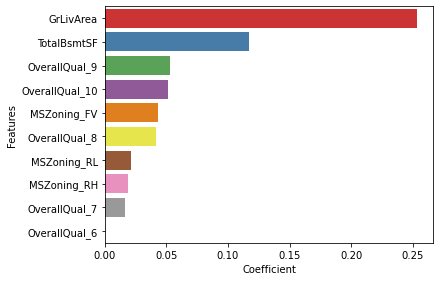

In [57]:
# bar plot to determine the variables that would affect pricing most using ridge regression
def findLassoCoeff(x):
    return lasso_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp_df = pd.DataFrame(list(zip( X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df['Coefficient'] = temp_df['Features'].apply(findLassoCoeff)
temp_df = temp_df.sort_values(by=['Coefficient'], ascending=False)
temp_df = temp_df.head(10)
temp_df

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp_df)
plt.show()

### 6. Model Evaluation

#### a. Normality check on Train and Test dataset

Text(0.5, 0, 'Errors')

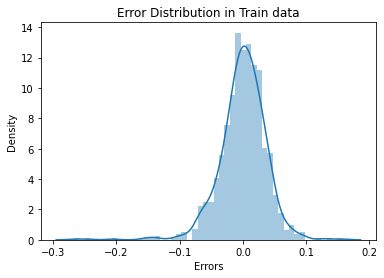

In [58]:

sns.distplot(y_train-y_train_pred)
plt.title('Error Distribution in Train data')
plt.xlabel('Errors')

Text(0.5, 0, 'Errors')

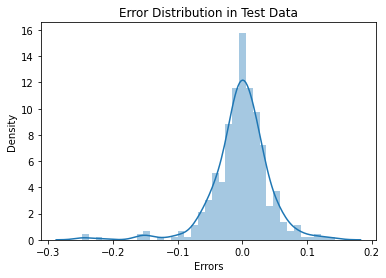

In [59]:
sns.distplot(y_test-y_test_pred)
plt.title('Error Distribution in Test Data')
plt.xlabel('Errors')

#### b. Homoscedasticity check on Train and Test dataset

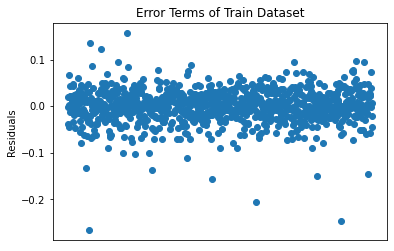

In [60]:
x= [i for i in range (1,y_train.shape[0]+1,1)]
plt.scatter(x,y_train-y_train_pred)
plt.title('Error Terms of Train Dataset')
plt.ylabel('Residuals')
plt.xticks([])
plt.show()

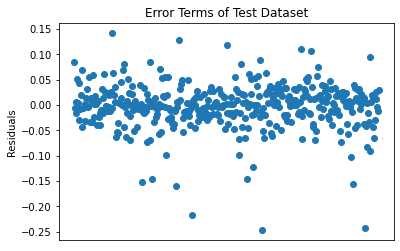

In [61]:
x= [i for i in range (1,y_test.shape[0]+1,1)]
plt.scatter(x,y_test-y_test_pred)
plt.title('Error Terms of Test Dataset')
plt.ylabel('Residuals')
plt.xticks([])
plt.show()

#### c. Linearity check on Train and Test dataset

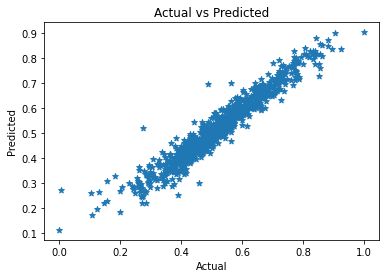

In [62]:
plt.scatter(y_train, y_train_pred, marker='*')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

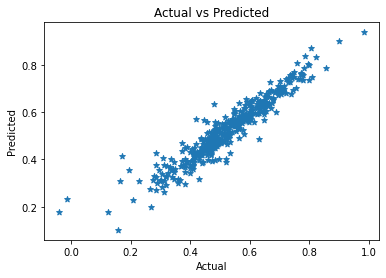

In [63]:
plt.scatter(y_test, y_test_pred, marker='*')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

The residual analysis for both test and train data seem to fit the assumptions of the Linear Regression.

- Residuals have mean of zero and closely normally distributed.
- Residuals do not have any pattern hence it has homoscedasticity.

### 7. Conclusions

Comparing the overall performance of Ridge and Lasso Regression, it is evident that Lasso performs slightly better than Ridge and also provide Feature elimination.

The top predictor variables of Lasso model that are significant in predicting house price are:

- GrLivArea - Above grade (ground) living area square feet 

- OverallQual_10 - Rates the overall material and finish of the house 

- OverallQual_9 - Rates the overall material and finish of the house 

- TotalBsmtSF - Total square feet of basement area 

- OverallQual_8 - Rates the overall material and finish of the house 

- BsmtFinSF1: Type 1 finished square feet

### 8. Subjective Questions 

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

__Ridge regresison - Optimal alpha = 2.0__

__Lasso regresison - Optimal alpha = 0.0001__

Going by the question, lets create a model where we double the alphas for ridge and lasso and check the new model

In [64]:
#Doubling the alphas
ridge_alpha_double = 2.0 * 2
lasso_alpha_double = 0.0001 * 2

#Ridge regression model
ridge_double = Ridge(alpha=ridge_alpha_double)
ridge_double_model = ridge_double.fit(X_train, y_train)

#Lasso regression model
lasso_double = Lasso(alpha=lasso_alpha_double)   
lasso_double_model = lasso_double.fit(X_train, y_train)

In [65]:
y_train_pred = ridge_double.predict(X_train)
y_test_pred = ridge_double.predict(X_test)

getPerfMetric(y_train,y_train_pred, y_test, y_test_pred)

Train r2 = 0.9277
Test r2 = 0.8909
Train RSS = 1.3278
Test RSS = 0.8512
Train MSE = 0.0014
Test MSE = 0.0021


In [66]:
y_train_pred = lasso_double.predict(X_train)
y_test_pred = lasso_double.predict(X_test)

getPerfMetric(y_train,y_train_pred, y_test, y_test_pred)

Train r2 = 0.9224
Test r2 = 0.8989
Train RSS = 1.4268
Test RSS = 0.7894
Train MSE = 0.0015
Test MSE = 0.0019


In [67]:
ridge_double_max_col = ""
ridge_double_max_coef = 0

lasso_double_max_col = ""
lasso_double_max_coef = 0


#Calculating max coeff and most imp column of ridge_double model
for (coef,column) in zip(ridge_double_model.coef_, X_train.columns):
    if coef > ridge_double_max_coef:
        ridge_double_max_coef = coef
        ridge_double_max_col = column


#Calculating max coeff and most imp column of lasso_double model
for (coef,column) in zip(lasso_double_model.coef_, X_train.columns):
    if coef > lasso_double_max_coef:
        lasso_double_max_coef = coef
        lasso_double_max_col = column
        

print()
print("Ridge_double max col = ",ridge_double_max_col)
print("Ridge_double max coef = ",ridge_double_max_coef)
print()

print()
print("Lasso_double max col = ",lasso_double_max_col)
print("Lasso_double max coef = ",lasso_double_max_coef)


Ridge_double max col =  GrLivArea
Ridge_double max coef =  0.11859450068891725


Lasso_double max col =  GrLivArea
Lasso_double max coef =  0.2473029089993794


Question 3 

After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [68]:
#Drop the above 5 variables from x_train
X_train_excluding_top_5 = X_train.drop(['GrLivArea','OverallQual_10','TotalBsmtSF','OverallQual_9','OverallQual_8'],axis=1)

#Lasso regression model
lasso_excluding_top_5 = Lasso(alpha=0.0001)   
lasso_excluding_top_5_model = lasso_excluding_top_5.fit(X_train_excluding_top_5, y_train)

In [69]:
lasso_dict=dict(zip(X_train_excluding_top_5.columns,lasso_excluding_top_5_model.coef_))
lasso_dict

{'LotFrontage': 0.012976322486460704,
 'LotArea': 0.07979985033513508,
 'MasVnrArea': 0.005163531059530132,
 'BsmtFinSF1': 0.12435270850404508,
 'BsmtUnfSF': 0.13008590512363236,
 '2ndFlrSF': 0.10194358909933825,
 'WoodDeckSF': 0.0218589720650091,
 'OpenPorchSF': 0.016620467749408414,
 'IsRemodelled': -0.004204664366381541,
 'BuiltOrRemodelAge': -0.03543133859655561,
 'OldOrNewGarage': 0.0019239413118113597,
 'MSSubClass_30': -0.040356042954181326,
 'MSSubClass_40': -0.01350681649363901,
 'MSSubClass_45': -0.0,
 'MSSubClass_50': -0.0,
 'MSSubClass_60': -0.0,
 'MSSubClass_70': 0.0014057815036966944,
 'MSSubClass_75': -0.0,
 'MSSubClass_80': 0.0,
 'MSSubClass_85': 0.0,
 'MSSubClass_90': -0.0017010586141776244,
 'MSSubClass_120': -0.0,
 'MSSubClass_160': -0.02394445248291929,
 'MSSubClass_180': -0.0,
 'MSSubClass_190': -0.0028819773372517725,
 'MSZoning_FV': 0.020052891589038453,
 'MSZoning_RH': 0.008356047663616865,
 'MSZoning_RL': 0.005926771011080727,
 'MSZoning_RM': 0.0008008165965736

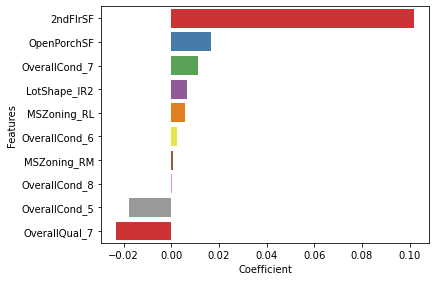

In [70]:
# bar plot to determine the variables that would affect pricing most using ridge regression
def findLassoCoeff(x):
    return lasso_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp_df = pd.DataFrame(list(zip( X_train_excluding_top_5.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df['Coefficient'] = temp_df['Features'].apply(findLassoCoeff)
temp_df = temp_df.sort_values(by=['Coefficient'], ascending=False)
temp_df = temp_df.head(10)
temp_df

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp_df)
plt.show()